In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
data = pd.read_csv("medical_insurance.csv")

In [205]:
data.shape

(100000, 54)

In [206]:
data= data.drop("person_id",axis=1)

In [207]:
data=data.fillna(0)

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  int64  
 1   sex                          100000 non-null  object 
 2   region                       100000 non-null  object 
 3   urban_rural                  100000 non-null  object 
 4   income                       100000 non-null  float64
 5   education                    100000 non-null  object 
 6   marital_status               100000 non-null  object 
 7   employment_status            100000 non-null  object 
 8   household_size               100000 non-null  int64  
 9   dependents                   100000 non-null  int64  
 10  bmi                          100000 non-null  float64
 11  smoker                       100000 non-null  object 
 12  alcohol_freq                 100000 non-null  object 
 13  

MULTICOLLINEARITY

In [209]:
# import pandas as pd
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# def get_vif(df):
#     numeric_df = df.select_dtypes(include=['number'])
#     vif_data = pd.DataFrame()
#     vif_data["feature"] = numeric_df.columns
#     vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i)
#                         for i in range(len(numeric_df.columns))]

#     return vif_data.sort_values(by="VIF", ascending=False)

# vif_results = get_vif(data)
# print(vif_results)

AGE


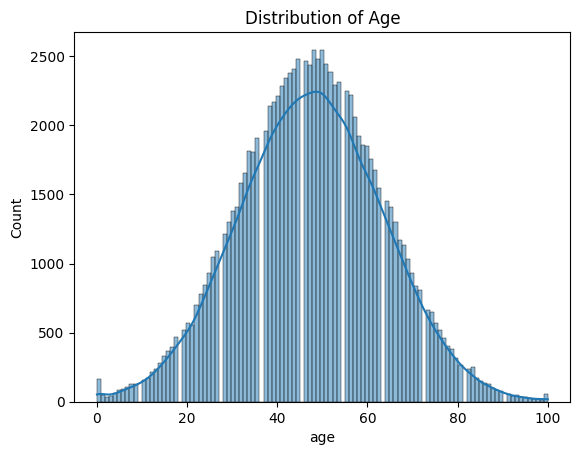

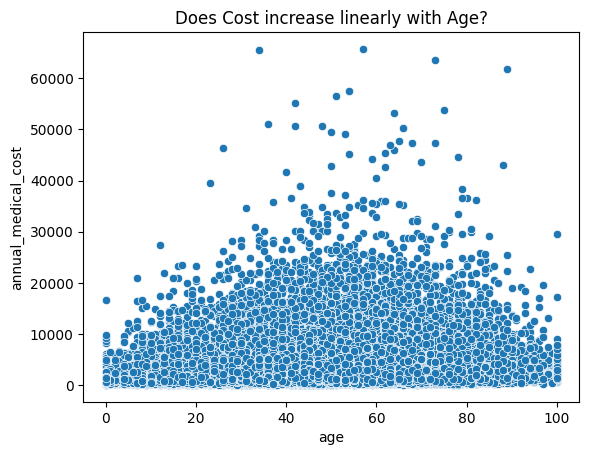

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for outliers and distribution
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Check relationship with Cost
sns.scatterplot(x=data['age'], y=data['annual_medical_cost'])
plt.title('Does Cost increase linearly with Age?')
plt.show()

In [211]:
print(data[['age', 'annual_medical_cost']].corr())

                          age  annual_medical_cost
age                  1.000000             0.131166
annual_medical_cost  0.131166             1.000000


In [212]:
from sklearn.preprocessing import StandardScaler
data['age_2'] = data['age'] ** 2
scaler = StandardScaler()
data[['age', 'age_2']] = scaler.fit_transform(data[['age', 'age_2']])

Income


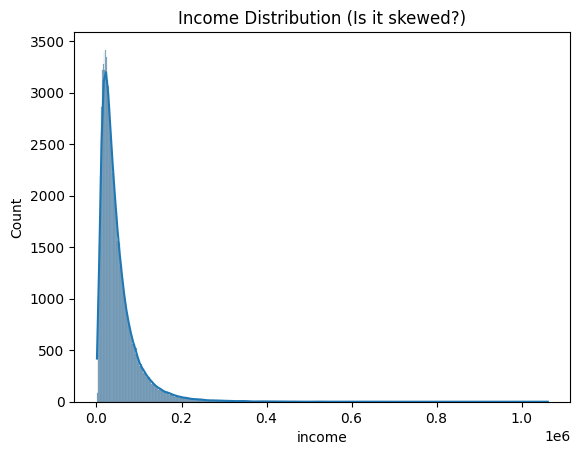

In [213]:
sns.histplot(data['income'], kde=True)
plt.title('Income Distribution (Is it skewed?)')
plt.show()

In [214]:
data['income'] = np.log1p(data['income'])

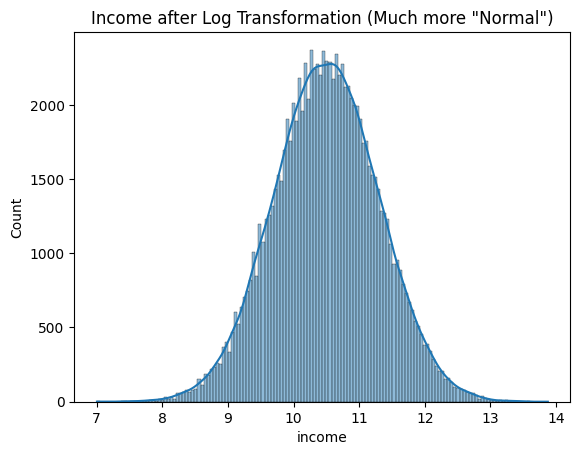

In [215]:
sns.histplot(data['income'], kde=True)
plt.title('Income after Log Transformation (Much more "Normal")')
plt.show()

BMI

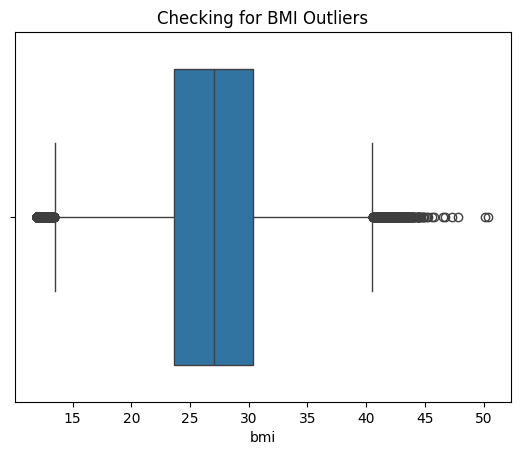

count    100000.000000
mean         26.990512
std           4.994883
min          12.000000
25%          23.600000
50%          27.000000
75%          30.400000
max          50.400000
Name: bmi, dtype: float64


In [216]:
sns.boxplot(x=data['bmi'])
plt.title('Checking for BMI Outliers')
plt.show()
print(data['bmi'].describe())

In [217]:
import numpy as np
from sklearn.preprocessing import StandardScaler
lower_limit = data['bmi'].quantile(0.01)
upper_limit = data['bmi'].quantile(0.99)
data['bmi'] = data['bmi'].clip(lower_limit, upper_limit)
scaler = StandardScaler()
data['bmi'] = scaler.fit_transform(data[['bmi']])

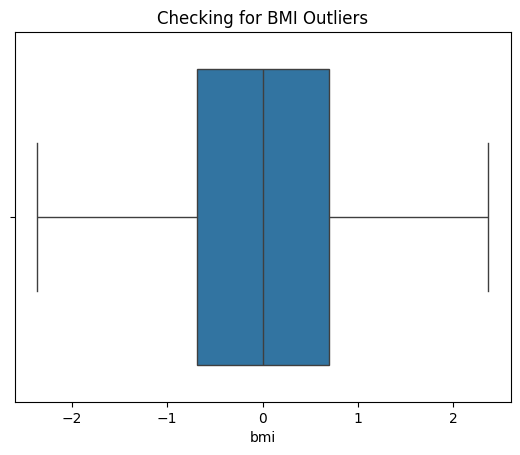

count    1.000000e+05
mean    -3.234391e-16
std      1.000005e+00
min     -2.360711e+00
25%     -6.902898e-01
50%      2.323718e-03
75%      6.949373e-01
max      2.365358e+00
Name: bmi, dtype: float64


In [218]:
sns.boxplot(x=data['bmi'])
plt.title('Checking for BMI Outliers')
plt.show()
print(data['bmi'].describe())

BP

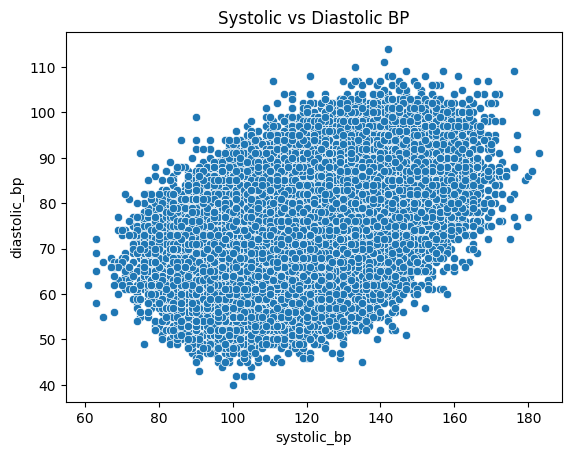

              systolic_bp  diastolic_bp
systolic_bp      1.000000      0.448186
diastolic_bp     0.448186      1.000000


In [219]:
sns.scatterplot(x=data['systolic_bp'], y=data['diastolic_bp'])
plt.title('Systolic vs Diastolic BP')
plt.show()
print(correlation := data[['systolic_bp', 'diastolic_bp']].corr())

In [220]:
data['systolic_bp'] = data['systolic_bp'].clip(lower=data['systolic_bp'].quantile(0.01),
                                               upper=data['systolic_bp'].quantile(0.99))
data['diastolic_bp'] = data['diastolic_bp'].clip(lower=data['diastolic_bp'].quantile(0.01),
                                                 upper=data['diastolic_bp'].quantile(0.99))
data['pulse_pressure'] = data['systolic_bp'] - data['diastolic_bp']

In [221]:
scaler = StandardScaler()
data[['systolic_bp', 'diastolic_bp', 'pulse_pressure']] = scaler.fit_transform(data[['systolic_bp', 'diastolic_bp', 'pulse_pressure']])


LDL

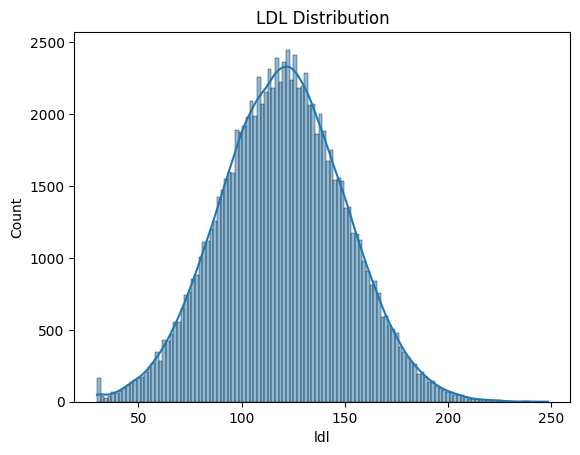

In [222]:
sns.histplot(data['ldl'], kde=True)
plt.title('LDL Distribution')
plt.show()

In [223]:
print(f"99th Percentile: {data['ldl'].quantile(0.99)}")
print(data['ldl'].describe())

99th Percentile: 190.6
count    100000.000000
mean        119.975065
std          30.262086
min          30.000000
25%          99.400000
50%         120.000000
75%         140.300000
max         248.300000
Name: ldl, dtype: float64


In [224]:
data['ldl'] = scaler.fit_transform(data[['ldl']])

HB!AC

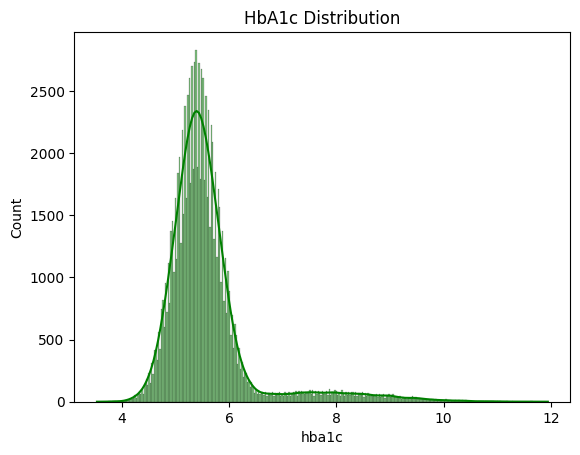

In [225]:
sns.histplot(data['hba1c'], kde=True, color='green')
plt.title('HbA1c Distribution')
plt.show()

In [226]:
upper_limit = data['hba1c'].quantile(0.99)
data['hba1c'] = data['hba1c'].clip(upper=upper_limit)
scaler = StandardScaler()

PROVIDER QUALITY

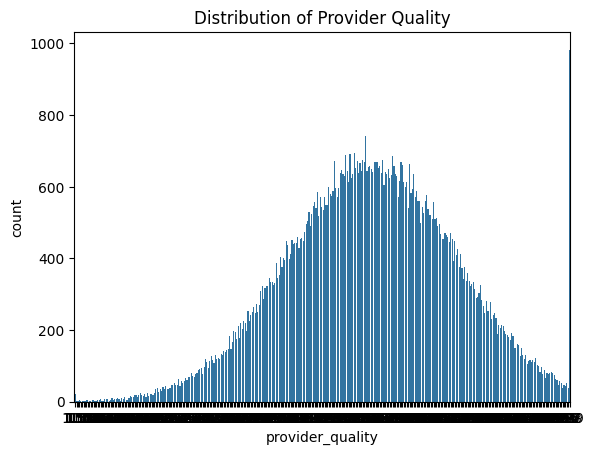

In [227]:
sns.countplot(x=data['provider_quality'])
plt.title('Distribution of Provider Quality')
plt.show()

RISK SCORE

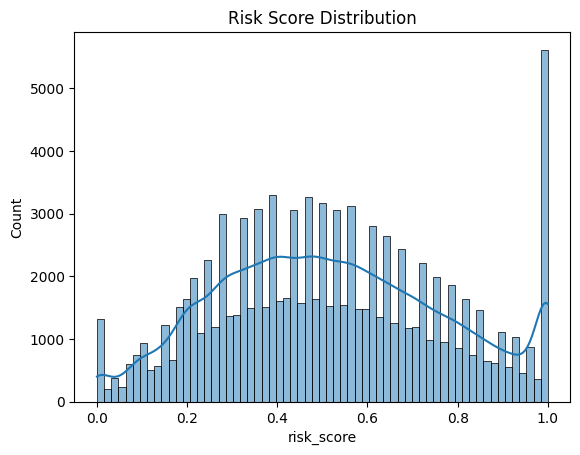

In [228]:
sns.histplot(data['risk_score'], kde=True)
plt.title('Risk Score Distribution')
plt.show()

In [229]:

disease_cols = [
    'hypertension', 'diabetes', 'asthma', 'copd',
    'cardiovascular_disease', 'cancer_history', 'kidney_disease',
    'liver_disease', 'arthritis', 'mental_health'
]

data['chronic_count'] = data[disease_cols].sum(axis=1)
data['is_multimorbid'] = (data['chronic_count'] >= 3).astype(int)
data = data.drop(['hypertension', 'diabetes', 'asthma', 'copd',
    'cardiovascular_disease', 'cancer_history', 'kidney_disease',
    'liver_disease', 'arthritis', 'mental_health'],axis = 1)

In [230]:
data.columns

Index(['age', 'sex', 'region', 'urban_rural', 'income', 'education',
       'marital_status', 'employment_status', 'household_size', 'dependents',
       'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'annual_medical_cost', 'annual_premium', 'monthly_premium',
       'claims_count', 'avg_claim_amount', 'total_claims_paid',
       'chronic_count', 'proc_imaging_count', 'proc_surgery_count',
       'proc_physio_count', 'proc_consult_count', 'proc_lab_count',
       'is_high_risk', 'had_major_procedure', 'age_2', 'pulse_pressure',
       'is_multimorbid'],
      dtype='object')

In [231]:
categorical_features = data.select_dtypes(include=["object"]).columns


In [232]:
correlation = data[['age', 'income', 'household_size', 'dependents', 'bmi',
       'visits_last_year', 'hospitalizations_last_3yrs',
       'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp',
       'diastolic_bp', 'ldl', 'hba1c', 'deductible', 'copay',
       'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality',
       'risk_score', 'annual_medical_cost', 'annual_premium',
       'monthly_premium', 'claims_count', 'avg_claim_amount',
       'total_claims_paid', 'chronic_count', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure', 'age_2',
       'pulse_pressure', 'is_multimorbid']].corr()


In [233]:
correlation[correlation > 0.75].stack().reset_index().drop_duplicates().sort_values(0, ascending=False)

,level_0,level_1,0
0,age,age,1.000000
2,income,income,1.000000
3,household_size,household_size,1.000000
8,visits_last_year,visits_last_year,1.000000
7,bmi,bmi,1.000000
6,dependents,dependents,1.000000
20,copay,copay,1.000000
19,deductible,deductible,1.000000
17,ldl,ldl,1.000000
9,hospitalizations_last_3yrs,hospitalizations_last_3yrs,1.000000


In [234]:
correlation.filter(like='annual_medical_cost').sort_values(by='annual_medical_cost', ascending=False)

,annual_medical_cost
annual_medical_cost,1.000000
monthly_premium,0.965416
annual_premium,0.965415
total_claims_paid,0.739402
avg_claim_amount,0.632996
risk_score,0.305971
chronic_count,0.296720
is_high_risk,0.251923
days_hospitalized_last_3yrs,0.230246
hospitalizations_last_3yrs,0.208640


In [235]:
#data['age_squared'] = data['age'] ** 2
#data['bmi_squared'] = data['bmi'] ** 2

In [236]:
data['log_medical_cost'] = np.log1p(data['annual_medical_cost'])
data['log_premium'] = np.log1p(data['annual_premium'])
data['log_claims'] = np.log1p(data['total_claims_paid'])
data['log_visits'] = np.log1p(data['visits_last_year'])

In [237]:
data = data.drop(['monthly_premium','avg_claim_amount','visits_last_year','is_high_risk','risk_score','days_hospitalized_last_3yrs','proc_surgery_count','systolic_bp','dependents','age_2'],axis=1)

In [238]:
y=data['log_medical_cost']

In [239]:
data=data.drop(['annual_medical_cost','log_medical_cost'],axis=1)

In [240]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(df):
    numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['annual_medical_cost'], errors='ignore')
    X = add_constant(numeric_df)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data[vif_data['feature'] != 'const'].sort_values(by="VIF", ascending=False)
vif_results = calculate_vif(data)
print(vif_results)

                       feature       VIF
15              annual_premium  8.076705
26                 log_premium  6.266240
17           total_claims_paid  3.772612
27                  log_claims  2.733444
16                claims_count  2.515070
18               chronic_count  2.394286
28                  log_visits  2.221048
1                          age  1.495972
24              pulse_pressure  1.437641
7                 diastolic_bp  1.409072
25              is_multimorbid  1.386696
5   hospitalizations_last_3yrs  1.217475
23         had_major_procedure  1.212836
6             medication_count  1.185856
9                        hba1c  1.099879
19          proc_imaging_count  1.027112
22              proc_lab_count  1.026536
21          proc_consult_count  1.025373
20           proc_physio_count  1.024206
8                          ldl  1.013149
10                  deductible  1.004781
4                          bmi  1.004558
3               household_size  1.000387
2               

In [241]:
categorical_features = data.select_dtypes(include=["object"]).columns

In [242]:
categorical_features

Index(['sex', 'region', 'urban_rural', 'education', 'marital_status',
       'employment_status', 'smoker', 'alcohol_freq', 'plan_type',
       'network_tier'],
      dtype='object')

In [243]:
import pandas as pd
from scipy.stats import chi2_contingency
data['cost_category'] = pd.qcut(y, q=2, labels=['Low', 'High'])
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    if col == 'cost_category': continue
    table = pd.crosstab(data[col].astype(str), data['cost_category'])
    chi2, p, dof, expected = chi2_contingency(table)
    status = "SIGNIFICANT" if p < 0.05 else "NOT SIGNIFICANT"
    print(f"Feature: {col:20} | P-Value: {p:.4f} | Result: {status}")

Feature: sex                  | P-Value: 0.2357 | Result: NOT SIGNIFICANT
Feature: region               | P-Value: 0.3799 | Result: NOT SIGNIFICANT
Feature: urban_rural          | P-Value: 0.8737 | Result: NOT SIGNIFICANT
Feature: education            | P-Value: 0.3310 | Result: NOT SIGNIFICANT
Feature: marital_status       | P-Value: 0.4622 | Result: NOT SIGNIFICANT
Feature: employment_status    | P-Value: 0.1969 | Result: NOT SIGNIFICANT
Feature: smoker               | P-Value: 0.0000 | Result: SIGNIFICANT
Feature: alcohol_freq         | P-Value: 0.0414 | Result: SIGNIFICANT
Feature: plan_type            | P-Value: 0.5468 | Result: NOT SIGNIFICANT
Feature: network_tier         | P-Value: 0.8534 | Result: NOT SIGNIFICANT


In [244]:
import pandas as pd
from scipy.stats import chi2_contingency

# 1. Select all object/categorical columns
cat_cols = data.select_dtypes(include=['object']).columns

# 2. Loop through pairs (example: 'smoker' vs everything else)
base_col = 'smoker'  # Change this to any column you want to test against

for col in cat_cols:
    if col == base_col: continue

    # Create the cross-tabulation table
    contingency_table = pd.crosstab(data[base_col], data[col])

    # Run Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Significance result
    status = "RELATED (Dependent)" if p < 0.05 else "INDEPENDENT"
    print(f"{base_col} vs {col:15} | p-value: {p:.4f} | {status}")

smoker vs sex             | p-value: 0.1376 | INDEPENDENT
smoker vs region          | p-value: 0.2399 | INDEPENDENT
smoker vs urban_rural     | p-value: 0.6521 | INDEPENDENT
smoker vs education       | p-value: 0.8565 | INDEPENDENT
smoker vs marital_status  | p-value: 0.0919 | INDEPENDENT
smoker vs employment_status | p-value: 0.4531 | INDEPENDENT
smoker vs alcohol_freq    | p-value: 0.3435 | INDEPENDENT
smoker vs plan_type       | p-value: 0.7975 | INDEPENDENT
smoker vs network_tier    | p-value: 0.3504 | INDEPENDENT


In [245]:
data= data.drop('cost_category',axis=1)

In [246]:
import pandas as pd
from scipy.stats import chi2_contingency
cat_cols = data.select_dtypes(include=['object']).columns
clean_cat_data = data[cat_cols].dropna()
valid_cols = [col for col in cat_cols if clean_cat_data[col].nunique() > 1]

results = []
for i in range(len(valid_cols)):
    for j in range(i + 1, len(valid_cols)):
        col1 = valid_cols[i]
        col2 = valid_cols[j]
        table = pd.crosstab(clean_cat_data[col1], clean_cat_data[col2])
        if table.empty or table.sum().sum() == 0:
            continue

        chi2, p, dof, expected = chi2_contingency(table)

        results.append({
            'Feature 1': col1,
            'Feature 2': col2,
            'p_value': p,
            'Relationship': 'dependent' if p < 0.05 else 'independent'
        })

chi_df = pd.DataFrame(results)
print(chi_df)

            Feature 1          Feature 2   p_value Relationship
0                 sex             region  0.986154  independent
1                 sex        urban_rural  0.374911  independent
2                 sex          education  0.217239  independent
3                 sex     marital_status  0.202982  independent
4                 sex  employment_status  0.591684  independent
5                 sex             smoker  0.137577  independent
6                 sex       alcohol_freq  0.589575  independent
7                 sex          plan_type  0.558721  independent
8                 sex       network_tier  0.835482  independent
9              region        urban_rural  0.927268  independent
10             region          education  0.471160  independent
11             region     marital_status  0.896980  independent
12             region  employment_status  0.409882  independent
13             region             smoker  0.239919  independent
14             region       alcohol_freq

In [247]:
data.columns

Index(['age', 'sex', 'region', 'urban_rural', 'income', 'education',
       'marital_status', 'employment_status', 'household_size', 'bmi',
       'smoker', 'alcohol_freq', 'hospitalizations_last_3yrs',
       'medication_count', 'diastolic_bp', 'ldl', 'hba1c', 'plan_type',
       'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'annual_premium',
       'claims_count', 'total_claims_paid', 'chronic_count',
       'proc_imaging_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'had_major_procedure', 'pulse_pressure',
       'is_multimorbid', 'log_premium', 'log_claims', 'log_visits'],
      dtype='object')

In [248]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(df):
    numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['annual_medical_cost'], errors='ignore')
    X = add_constant(numeric_df)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data[vif_data['feature'] != 'const'].sort_values(by="VIF", ascending=False)
vif_results = calculate_vif(data)
print(vif_results)

                       feature       VIF
15              annual_premium  8.076705
26                 log_premium  6.266240
17           total_claims_paid  3.772612
27                  log_claims  2.733444
16                claims_count  2.515070
18               chronic_count  2.394286
28                  log_visits  2.221048
1                          age  1.495972
24              pulse_pressure  1.437641
7                 diastolic_bp  1.409072
25              is_multimorbid  1.386696
5   hospitalizations_last_3yrs  1.217475
23         had_major_procedure  1.212836
6             medication_count  1.185856
9                        hba1c  1.099879
19          proc_imaging_count  1.027112
22              proc_lab_count  1.026536
21          proc_consult_count  1.025373
20           proc_physio_count  1.024206
8                          ldl  1.013149
10                  deductible  1.004781
4                          bmi  1.004558
3               household_size  1.000387
2               

In [249]:
# cols_to_remove = [
#     # Leakage
#     'claims_count', 'had_major_procedure',
#    'proc_imaging_count', 'proc_physio_count',
#     'proc_consult_count', 'proc_lab_count', 'diastolic_bp', 'policy_term_years', 'policy_changes_last_2yrs'
# ]
# data = data.drop(columns=cols_to_remove)

In [250]:
data.columns


Index(['age', 'sex', 'region', 'urban_rural', 'income', 'education',
       'marital_status', 'employment_status', 'household_size', 'bmi',
       'smoker', 'alcohol_freq', 'hospitalizations_last_3yrs',
       'medication_count', 'diastolic_bp', 'ldl', 'hba1c', 'plan_type',
       'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'annual_premium',
       'claims_count', 'total_claims_paid', 'chronic_count',
       'proc_imaging_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'had_major_procedure', 'pulse_pressure',
       'is_multimorbid', 'log_premium', 'log_claims', 'log_visits'],
      dtype='object')

In [251]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [261]:
data = data.copy()

# Ensure uniform string type
data['alcohol_freq'] = data['alcohol_freq'].fillna('0').astype(str)


In [262]:
ordinal_features = [
    'urban_rural',
    'plan_type',
    'smoker',
    'alcohol_freq'
]

nominal_features = [
    'sex',
    'region',
    'marital_status',
    'education',
    'employment_status',
    'network_tier'
]

numerical_features = [
    col for col in data.columns
    if col not in ordinal_features + nominal_features
]


In [267]:
ordinal_categories = [
    ['Rural', 'Suburban', 'Urban'],      # urban_rural
    ['HMO', 'EPO', 'POS', 'PPO'],         # plan_type
    ['Never', 'Former', 'Current'],       # smoker
    ['0', 'Occasional', 'Weekly', 'Daily']  # alcohol_freq  ✅ FIX
]


In [268]:
preprocessor = ColumnTransformer(
    transformers=[
        (
            'num',
            Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]),
            numerical_features
        ),
        (
            'ord',
            Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder(categories=ordinal_categories))
            ]),
            ordinal_features
        ),
        (
            'nom',
            OneHotEncoder(drop='first', handle_unknown='ignore'),
            nominal_features
        )
    ]
)


In [269]:
X = data.copy()
y = y.copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [270]:
X_train_final = preprocessor.fit_transform(X_train)
X_test_final  = preprocessor.transform(X_test)


In [271]:
model_lr = LinearRegression()
model_lr.fit(X_train_final, y_train)


LinearRegression()

In [272]:
y_train_pred = model_lr.predict(X_train_final)
y_test_pred  = model_lr.predict(X_test_final)


In [273]:
print("LINEAR REGRESSION PERFORMANCE")
print("=" * 40)

print(f"Train R² : {r2_score(y_train, y_train_pred):.4f}")
print(f"Test  R² : {r2_score(y_test, y_test_pred):.4f}")

print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"Test MAE : {mean_absolute_error(y_test, y_test_pred):.4f}")


LINEAR REGRESSION PERFORMANCE
Train R² : 0.9674
Test  R² : 0.9674
Test RMSE: 0.1537
Test MAE : 0.1042


In [274]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
import numpy as np
y_pred = model_lr.predict(X_test_final)
residuals = y_test - y_pred

print("="*45)
print("STATISTICAL TEST SUMMARY")
print("="*45)

# Independence
dw_val = durbin_watson(residuals)
print(f"Independence (Durbin-Watson): {dw_val:.2f} (Ideal: 1.5–2.5)")

# Homoscedasticity
_, bp_p, _, _ = het_breuschpagan(residuals, sm.add_constant(X_test_final))
print(f"Homoscedasticity (Breusch-Pagan) p-value: {bp_p:.4f} (Ideal > 0.05)")

# Normality
_, jb_p, _, _ = sm.stats.stattools.jarque_bera(residuals)
print(f"Normality (Jarque-Bera) p-value: {jb_p:.4f} (Ideal > 0.05)")

print("="*45)


STATISTICAL TEST SUMMARY
Independence (Durbin-Watson): 1.98 (Ideal: 1.5–2.5)
Homoscedasticity (Breusch-Pagan) p-value: 0.0000 (Ideal > 0.05)
Normality (Jarque-Bera) p-value: 0.0000 (Ideal > 0.05)


In [275]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X = pd.get_dummies(data, drop_first=True)

# Ensure no NaNs are present after get_dummies for numerical columns
X = X.fillna(0)

y = y
# 2. Split and Fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=31, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# 3. Predict and Obtain Metrics
y_pred = model.predict(X_test)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE:  ${mean_absolute_error(y_test, y_pred):.2f}")
print(f"R2:   {r2_score(y_test, y_pred):.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2707
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 58
[LightGBM] [Info] Start training from score 7.643673
RMSE: 0.03
MAE:  $0.01
R2:   0.9991


In [276]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X = data
y = y
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_xgb = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42
)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [277]:
# Predictions
y_pred = model_xgb.predict(X_test)

# Metrics
print(f"R^2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error (MAE): ${mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R^2 Score: 0.9991
Mean Absolute Error (MAE): $0.01
RMSE: $0.03


In [282]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
)

rf_model.fit(X_train_final, y_train)
y_train_pred = rf_model.predict(X_train_final)
y_test_pred  = rf_model.predict(X_test_final)
print("RANDOM FOREST REGRESSION PERFORMANCE")
print("=" * 45)

print(f"Train R² : {r2_score(y_train, y_train_pred):.4f}")
print(f"Test  R² : {r2_score(y_test, y_test_pred):.4f}")

print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"Test MAE : {mean_absolute_error(y_test, y_test_pred):.4f}")


RANDOM FOREST REGRESSION PERFORMANCE
Train R² : 0.9994
Test  R² : 0.9993
Test RMSE: 0.0228
Test MAE : 0.0156


In [286]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42,
)

rf_model.fit(X_train_final, y_train)
y_train_pred = rf_model.predict(X_train_final)
y_test_pred  = rf_model.predict(X_test_final)
print("RANDOM FOREST REGRESSION PERFORMANCE")
print("=" * 45)

print(f"Train R² : {r2_score(y_train, y_train_pred):.4f}")
print(f"Test  R² : {r2_score(y_test, y_test_pred):.4f}")

print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"Test MAE : {mean_absolute_error(y_test, y_test_pred):.4f}")


RANDOM FOREST REGRESSION PERFORMANCE
Train R² : 0.9672
Test  R² : 0.9669
Test RMSE: 0.1549
Test MAE : 0.1234


In [287]:

num_features = numerical_features
ord_features = ordinal_features

ohe = preprocessor.named_transformers_['nom']
ohe_feature_names = ohe.get_feature_names_out(nominal_features)

final_feature_names = (
    num_features +
    ord_features +
    list(ohe_feature_names)
)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': final_feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)


                            feature  importance
14                   annual_premium    0.520023
25                      log_premium    0.453021
50            network_tier_Platinum    0.016674
49                network_tier_Gold    0.008699
9                        deductible    0.001583
3                               bmi    0.000000
6                      diastolic_bp    0.000000
4        hospitalizations_last_3yrs    0.000000
7                               ldl    0.000000
2                    household_size    0.000000
10                            copay    0.000000
5                  medication_count    0.000000
11                policy_term_years    0.000000
12         policy_changes_last_2yrs    0.000000
13                 provider_quality    0.000000
15                     claims_count    0.000000
16                total_claims_paid    0.000000
8                             hba1c    0.000000
0                               age    0.000000
1                            income    0